In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.preprocessing import MinMaxScaler

In [56]:
cols = [i for i in range(280)]
df = pd.read_csv('D:/MS sem2/DM/Project/arrhythmia.data', names = cols)

In [57]:
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [58]:
df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
275    0
276    0
277    0
278    0
279    0
Length: 280, dtype: int64

In [59]:
df.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
        ...   
275    float64
276    float64
277    float64
278    float64
279      int64
Length: 280, dtype: object

In [60]:
cols_with_qmark = list()
for itr, col in enumerate(df.columns):
    try:
        x = df[col].str.contains('\?').sum()
        cols_with_qmark.append(col)
        print(f"{col} - {x}")
    except:
        pass

10 - 8
11 - 22
12 - 1
13 - 376
14 - 1


In [61]:
df = df.replace('?', np.nan)

In [62]:
df = df.drop([13], axis = 1)
cols_with_qmark.remove(13)

In [63]:
for itr, col in enumerate(cols_with_qmark):
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[10].fillna(df[col].mean())

In [64]:
for itr, col in enumerate(df.columns):
    if len(df[col].unique().tolist()) == 1:
        df = df.drop([col], axis = 1)

In [65]:
df.shape

(452, 262)

In [66]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [211]:
import numpy as np

# X is the dataset, where each row corresponds to an instance and each column corresponds to a feature
X = X

# Compute the correlation matrix between features
corr_matrix = np.corrcoef(X.T)

# Set the maximum correlation value as rho2
rho2 = np.max(np.abs(corr_matrix - np.identity(X.shape[1])))
print(rho2)

1.0


In [68]:
y.value_counts()

1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: 279, dtype: int64

<AxesSubplot:xlabel='279', ylabel='Density'>

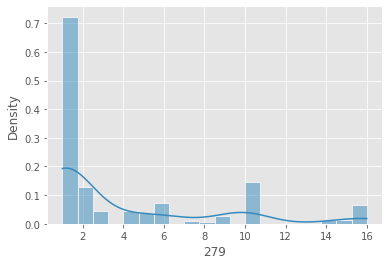

In [69]:
sns.histplot(y, kde=True, stat="density", linewidth=1, bins = 16, common_bins = False, binwidth = 0.75)

In [70]:
scaler = MinMaxScaler()
X_norm = scaler.fit(X)
X_norm = scaler.transform(X)
X_norm_df = pd.DataFrame(X_norm)
X_norm_df
#X_normX = X-X.min()/(X.max() - X.min())

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,0.660574,0.638554,1.000000,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,0.558747,0.614458,1.000000,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,0.583812,0.783133,1.000000,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,...,0.687206,0.686747,1.000000,0.516949,0.923077,0.0,0.37500,0.716667,0.592481,0.648544
4,0.903614,0.0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,...,0.587467,0.626506,1.000000,0.555085,0.874126,0.0,0.21875,0.825000,0.523308,0.656311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.168498,0.570732,0.395894,...,0.328982,0.674699,1.000000,0.182203,0.825175,0.0,0.46875,0.550000,0.299248,0.246602
448,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.340659,0.356098,0.756598,...,0.762924,0.614458,1.000000,0.661017,0.944056,0.0,0.37500,0.700000,0.618045,0.653722
449,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.315018,0.565854,0.255132,...,0.000000,0.819277,1.000000,0.690678,0.000000,0.0,0.71875,0.583333,0.000000,0.034951
450,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.402930,0.307317,0.662757,...,0.650653,0.698795,0.902439,0.508475,0.975524,0.0,0.40625,0.700000,0.520301,0.551456


In [71]:
y.head

<bound method NDFrame.head of 0       8
1       6
2      10
3       1
4       7
       ..
447     1
448    10
449     2
450     1
451     1
Name: 279, Length: 452, dtype: int64>

In [72]:
cleaned_df = pd.concat([X_norm_df, y], axis = 1)

In [73]:
cleaned_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,279
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,0.638554,1.000000,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579,8
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,0.614458,1.000000,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971,6
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,0.783133,1.000000,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990,10
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,...,0.686747,1.000000,0.516949,0.923077,0.0,0.37500,0.716667,0.592481,0.648544,1
4,0.903614,0.0,0.125926,0.435294,0.248120,0.345420,0.462094,0.252747,0.502439,0.457478,...,0.626506,1.000000,0.555085,0.874126,0.0,0.21875,0.825000,0.523308,0.656311,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.638554,1.0,0.081481,0.376471,0.187970,0.379771,0.541516,0.168498,0.570732,0.395894,...,0.674699,1.000000,0.182203,0.825175,0.0,0.46875,0.550000,0.299248,0.246602,1
448,0.445783,0.0,0.125926,0.464706,0.338346,0.261450,0.465704,0.340659,0.356098,0.756598,...,0.614458,1.000000,0.661017,0.944056,0.0,0.37500,0.700000,0.618045,0.653722,10
449,0.433735,0.0,0.090370,0.364706,0.398496,0.335878,0.480144,0.315018,0.565854,0.255132,...,0.819277,1.000000,0.690678,0.000000,0.0,0.71875,0.583333,0.000000,0.034951,2
450,0.385542,1.0,0.074074,0.288235,0.285714,0.202290,0.555957,0.402930,0.307317,0.662757,...,0.698795,0.902439,0.508475,0.975524,0.0,0.40625,0.700000,0.520301,0.551456,1


In [74]:
corr_matrix = cleaned_df.corr()

In [75]:
cleaned_df.corr().loc[279,:]

0     -0.092381
1     -0.178080
2      0.006648
3     -0.090151
4      0.323879
         ...   
257   -0.086427
258   -0.030798
259    0.003476
260   -0.009275
279    1.000000
Name: 279, Length: 262, dtype: float64

<AxesSubplot:>

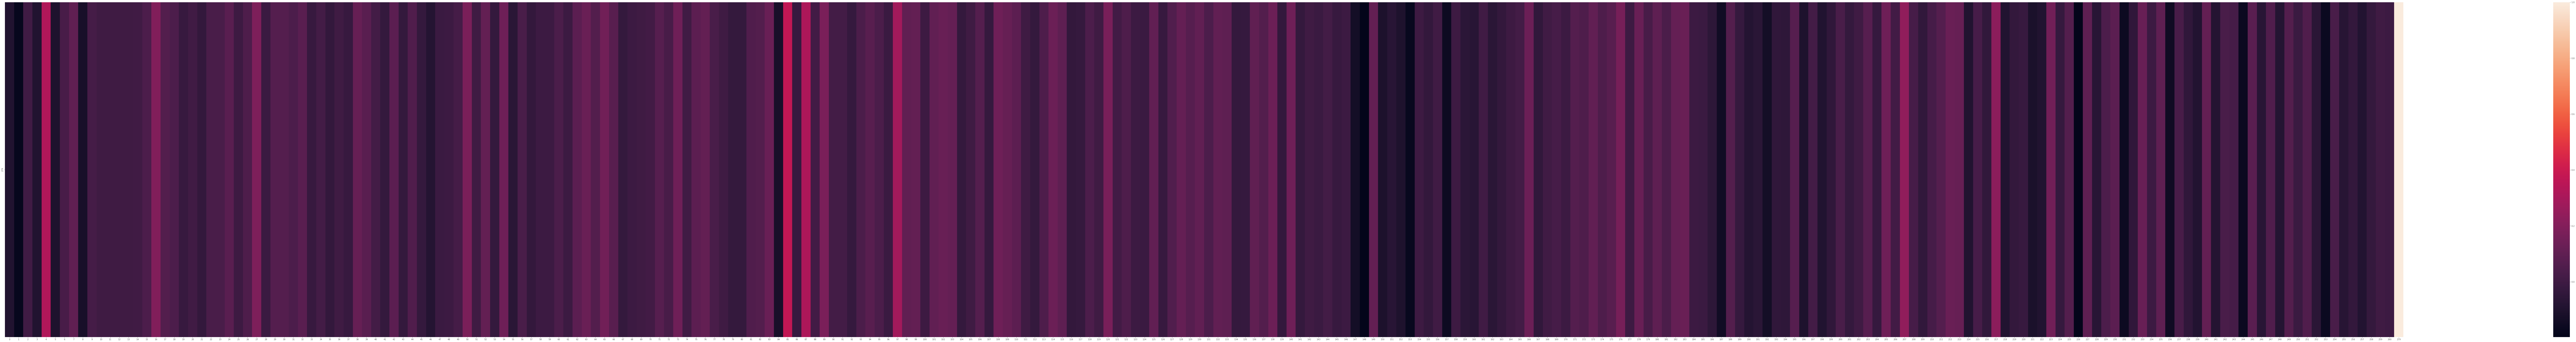

In [76]:
fig, axis = plt.subplots(1, 1, figsize = (cleaned_df.shape[1], 30))
sns.heatmap(cleaned_df.corr().loc[[279],:])

In [23]:
df.to_csv('cleaned_arythmia.csv')

In [24]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Calculate the correlation matrix
corr_matrix = np.corrcoef(cleaned_df, rowvar=False)

# Convert the correlation matrix to a distance matrix
dist_matrix = 1 - corr_matrix

# Apply hierarchical clustering to the distance matrix
n_clusters = 10 # choose number of clusters
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')
cluster_labels = hc.fit_predict(dist_matrix)

# Assign each feature to its corresponding cluster
feature_clusters = [[] for i in range(n_clusters)]
for i, label in enumerate(cluster_labels):
    feature_clusters[label].append(i)
    
for i, cluster in enumerate(feature_clusters):
    print(f"Cluster {i}:")
    for feature_idx in cluster:
        print(cleaned_df.columns[feature_idx])

Cluster 0:
25
32
33
37
45
46
53
57
58
69
71
79
84
96
99
107
111
119
123
142
145
151
157
167
184
185
190
196
204
208
214
215
221
222
224
225
231
232
234
235
241
246
255
Cluster 1:
10
11
12
13
17
61
77
88
93
94
106
116
124
141
143
149
155
164
165
169
171
180
194
209
216
219
229
Cluster 2:
41
78
122
154
161
193
200
218
223
228
230
233
240
243
249
252
258
Cluster 3:
16
50
54
63
80
83
85
87
89
91
95
97
98
101
103
109
110
113
121
130
138
176
182
183
205
207
211
212
217
227
237
279
Cluster 4:
0
3
19
31
35
47
55
68
82
86
90
92
102
104
112
115
125
126
134
159
198
206
Cluster 5:
2
5
8
14
20
21
28
29
36
40
44
48
51
52
56
59
60
64
70
74
75
81
105
117
118
127
128
135
136
139
144
158
160
168
170
175
178
188
197
199
238
239
248
256
257
Cluster 6:
9
26
30
38
42
43
72
76
156
162
163
166
172
173
195
201
202
242
245
250
251
254
259
260
Cluster 7:
22
27
39
62
65
73
147
150
152
153
186
189
191
192
Cluster 8:
1
49
66
67
146
148
177
179
187
226
236
244
253
Cluster 9:
4
6
7
15
18
23
24
34
100
108
114
120
129


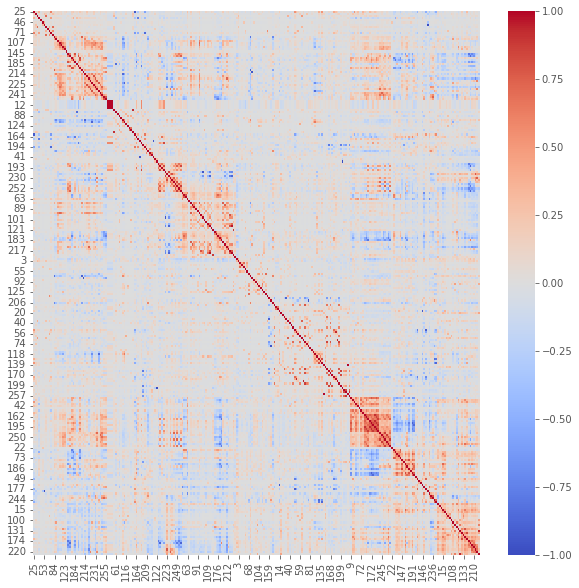

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame with the rows and columns ordered by cluster labels
clustered_df = cleaned_df.iloc[:, np.concatenate(feature_clusters)]

# Calculate the correlation matrix of the clustered DataFrame
clustered_corr_matrix = clustered_df.corr()

# Set up the figure
fig, ax = plt.subplots(figsize=(10,10))

# Plot the heatmap
sns.heatmap(clustered_corr_matrix, cmap='coolwarm', ax=ax)

# Show the plot
plt.show()



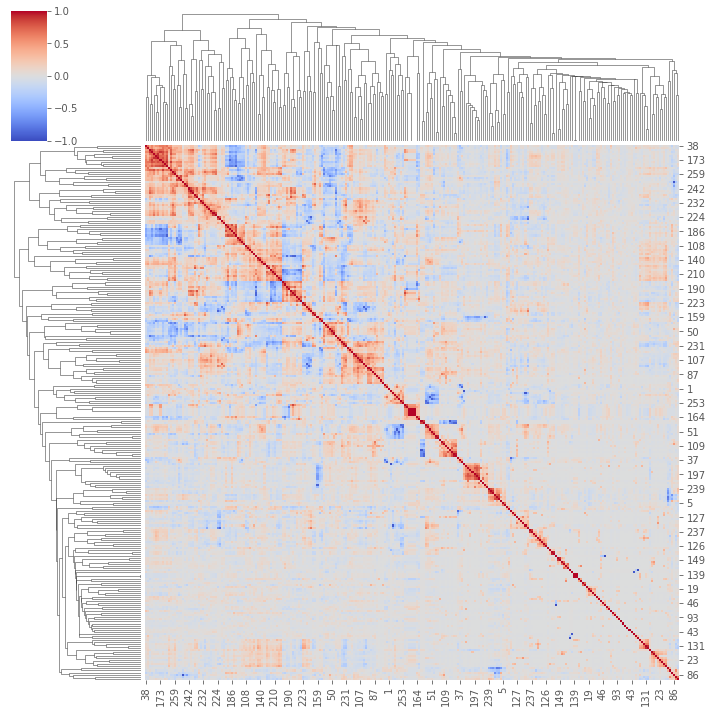

In [26]:
import seaborn as sns
import numpy as np

# Calculate the correlation matrix
corr_matrix = np.corrcoef(cleaned_df, rowvar=False)

# Convert the correlation matrix to a distance matrix
dist_matrix = 1 - corr_matrix

# Apply hierarchical clustering to the distance matrix
n_clusters = 10 # choose number of clusters
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')
cluster_labels = hc.fit_predict(dist_matrix)

# Assign each feature to its corresponding cluster
feature_clusters = [[] for i in range(n_clusters)]
for i, label in enumerate(cluster_labels):
    feature_clusters[label].append(i)

# Create a new DataFrame with the rows and columns ordered by cluster labels
clustered_df = cleaned_df.iloc[:, np.concatenate(feature_clusters)]

# Calculate the correlation matrix of the clustered DataFrame
clustered_corr_matrix = clustered_df.corr()

#Create the clustermap
sns.clustermap(clustered_corr_matrix, cmap='coolwarm', figsize=(10,10))


262


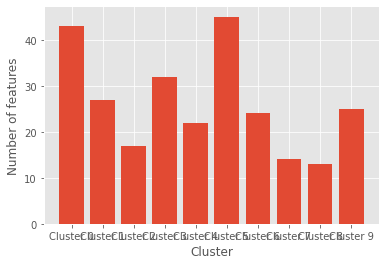

In [27]:
import matplotlib.pyplot as plt

# Count the number of features in each cluster
cluster_counts = [len(cluster) for cluster in feature_clusters]
print(sum(cluster_counts))

# Create a bar plot of the feature counts
fig, ax = plt.subplots()
ax.bar(range(n_clusters), cluster_counts)
ax.set_xlabel('Cluster')
ax.set_ylabel('Number of features')
ax.set_xticks(range(n_clusters))
ax.set_xticklabels([f'Cluster {i}' for i in range(n_clusters)])
plt.show()


[43]
[43, 59]
[43, 59, 107]
[43, 59, 107, 116]
[43, 59, 107, 116, 243]
[43, 59, 107, 116, 243, 160]
[43, 59, 107, 116, 243, 160, 81]
[43, 59, 107, 116, 243, 160, 81, 69]
[43, 59, 107, 116, 243, 160, 81, 69, 134]
[43, 59, 107, 116, 243, 160, 81, 69, 134, 138]


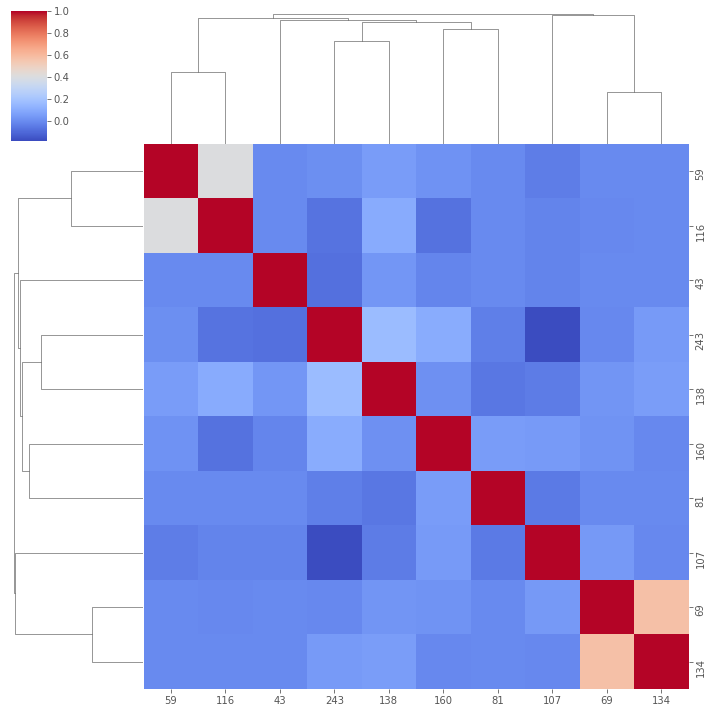

In [28]:
# Calculate the mean correlation of each feature within each cluster
clustered_corr_matrix = clustered_df.corr()
representative_features = []
for cluster in feature_clusters:
    cluster_corr = clustered_corr_matrix.iloc[cluster, cluster]
    mean_corr = cluster_corr.mean(axis=0)
    representative_feature_idx = mean_corr.idxmax()
    representative_features.append(clustered_df.columns[representative_feature_idx])
    print(representative_features)

# Use the representative features to visualize the clusters
representative_df = clustered_df[representative_features]
sns.clustermap(representative_df.corr(), cmap='coolwarm', figsize=(10,10))


More specifically, on line 19 of the code, the correlation degree between f_1-th and feature f_i is calculated, denoted by SU(f_1-th, f_i). If this correlation degree is greater than or equal to min(SU(f_1-th, C), SU(f_i, C)), then feature f_i is considered similar to f_1-th and is added to the current cluster Clusterk.

Therefore, the value of min_sim controls how strict or lenient the similarity criterion is for adding features to the cluster. A smaller value of min_sim will result in fewer features being added to the cluster, while a larger value of min_sim will result in more features being added.

In [229]:
import numpy as np

def find_strong_relevance_features(F, C, th=None):
    D = F.shape[1]  # number of features
    SU = np.zeros(D)  # array to store the relevance values
    for i in range(D):
        if sum(F[:, i] == 1) == 0 or sum(F[:, i] == 0) == 0:
            SU[i] = 0
        else:
            SU[i] = sum(C == 1) / sum(F[:, i] == 1) - sum(C == 0) / sum(F[:, i] == 0)
    SUmax = max(SU)
    # Determine the threshold value
    if th is None:
        rho0 = min(0.1 * SUmax, SU[D-1] / np.log2(D))
    else:
        rho0 = min(0.1 * SUmax, SU[D-1] / np.log2(D) - th)
    # Find the strong relevance features
    F_strong = []
    SU_strong = []
    for i in range(D):
        if SU[i] >= rho0:
            F_strong.append(i)
            SU_strong.append(SU[i])
    return F[:, F_strong], SU_strong,F_strong

# Row_val, C_score,index_val = find_strong_relevance_features(X_norm_df.values, y.values, None)

In [233]:
# def clustering(F_strong,SU_strong,rh0):
#      # Sort features by their C-relevance values
#     idx_sort = np.argsort(SU_strong)[::-1]
#     U0 = list(F_strong[idx_sort])
#     Clusterk = [U0[0]]
    
#     # Set temporary set U1 to U0
#     U1 = U0.copy()
    
#     # Set k to 1
#     k = 1
    
#     # Select the first feature f1 and its C-relevance value
#     f1 = U1.pop(0)
#     SU_f1 = SU_strong[idx_sort[0]]
#     # Steps 7-14: Remove features with weak correlation
#     for i in range(2, len(U1)):
#         # Calculate the C-relevance value of the i-th feature
#         SU_i = SU_strong[idx_sort[list(F_strong).index(U1[i])]]

#         # Calculate the difference value between the first feature and the i-th feature
#         dt = abs(SU_strong[idx_sort[0]] - SU_i)

#         if dt > rho1:
#             # Remove the i-th feature from U1
#             U1.remove(U1[i])

#     # Add U1 to Clusterk
#     Clusterk.extend(U1)

#     return Clusterk
#     return U0, Clusterk, U1, k, f1, SU_f1

# np


# def feature_clustering(F, SU, rho1):
#     # Sort features by C-relevance
#     idx_sort = np.argsort(SU)[::-1]
#     U0 = list(F[idx_sort])
#     Clusterk = []
#     clusters=[]
#     idx_dict = {tuple(f): i for i, f in enumerate(F)}
#     k = 1
#     while len(U0) > 0:
#         # Set temporary set U1 to U0
#         U1 = U0.copy()

#         # Select the first feature f1 and its C-relevance value
#         f1 = U1.pop(0)
#         SU_f1 = SU[idx_sort[0]]

#         # Steps 7-14: Remove features with weak correlation
#         i = 1
#         while i < len(U1):
#             # Calculate the C-relevance value of the i-th feature
#             SU_i = SU[idx_sort[np.where(idx_dict[tuple(U1[i])] == idx_sort)[0][0]]]

#             # Calculate the difference value between the first feature and the i-th feature
#             dt = abs(SU_f1 - SU_i)

#             if dt > rho1:
#                 # Remove the i-th feature from U1
#                 U1.pop(i)
#             else:
#                 i += 1

#         # Steps 16-22: Find all features similar to f1 from U1 and save them into Clusterk
#         Clusterk.append(f1)
#         j = 1
#         while j < len(U1):
#             # Calculate the correlation degree between f1 and the i-th feature
#             SU_f1_i = SU[idx_sort[np.where(idx_dict[tuple(U1[j])] == idx_sort)[0][0]]]
#             min_SU_f1_C = np.min([SU_f1, SU[idx_sort[np.where(np.array([tuple(f) for f in Clusterk]) == idx_sort)[0][0]]]])
#             min_SU_i_C = np.min([SU_f1_i, SU[idx_sort[np.where(np.array([tuple(f) for f in Clusterk]) == idx_sort)[0][0]]]])
            
#             # If the correlation degree between f1 and the i-th feature is greater than or equal to the minimum
#             # correlation degree between f1 and C, and between the i-th feature and C, then add the i-th feature to Clusterk
#             if SU_f1_i >= np.min([min_SU_f1_C, min_SU_i_C]):
#                 Clusterk.append(U1[j])
#                 U1.pop(j)
#             else:
#                 j += 1
        
#         # Set U0 to the remaining features that have not been clustered
#         U0 = U1

#         # Normalize Clusterk by dividing each feature by the length of Clusterk
#         Clusterk_norm = [np.divide(f, len(Clusterk)) for f in Clusterk]

#         # Append normalized Clusterk to a list of clusters
#         clusters.append(Clusterk_norm)

#         # Increment k and reset Clusterk
#         k += 1
#         Clusterk = []

#     # If |U0| > 1, add the remaining features to a cluster
#     if len(U0) > 1:
#         U0_norm = [np.divide(f, len(U0)) for f in U0]
#         clusters.append(U0_norm)
#     elif len(U0) == 1:
#         # Otherwise, if there is only one remaining feature, add it to the last cluster
#         Clusterk_norm = [np.divide(f, len(Clusterk)) for f in Clusterk]
#         Clusterk_norm.append(np.divide(U0[0], len(Clusterk)))

#         # Set the last cluster to be U0
#         Clusterk = Clusterk_norm

#         # Output the clustering result
#         return Clusterk
# def feature_clustering(F, SU, rho1):
#     # Sort features by C-relevance
#     idx_sort = np.argsort(SU)[::-1]
#     U0 = list(F[idx_sort])
#     clusters = [] # initialize clusters list
#     idx_dict = {tuple(f): i for i, f in enumerate(F)}
#     while len(U0) > 0:
#         # Set temporary set U1 to U0
#         U1 = U0.copy()

#         # Set k to 1
#         k = 1


import numpy as np

def feature_clustering(F, SU, rho1):
    # Sort features by C-relevance
    idx_sort = np.argsort(SU)[::-1]
    U0 = list(F[idx_sort])
    Clusterk = []
    idx_dict = {tuple(f): i for i, f in enumerate(F)}
    while len(U0) > 0:
        # Set temporary set U1 to U0
        U1 = U0.copy()

        # Select the first feature f1 and its C-relevance value
        f1 = U1.pop(0)
        SU_f1 = SU[idx_sort[0]]

        # Steps 7-14: Remove features with weak correlation
        i = 1
        while i < len(U1):
            # Calculate the C-relevance value of the i-th feature
            SU_i = SU[idx_sort[idx_dict[tuple(U1[i])]]]

            # Calculate the difference value between the first feature and the i-th feature
            dt = abs(SU_f1 - SU_i)

            if dt > rho1:
                # Remove the i-th feature from U1
                U1.pop(i)
            else:
                i += 1

        # Steps 16-22: Find all features similar to f1 from U1 and save them into Clusterk
        Clusterk.append(f1)
        j = 1
        while j < len(U1):
            # Calculate the correlation degree between f1 and the i-th feature
            SU_f1_i = SU[idx_sort[idx_dict[tuple(U1[j])]]]
            min_SU_f1_C = np.min([SU_f1, SU[idx_sort[np.where(np.array([tuple(f) for f in Clusterk]) == idx_sort)[0][0]]]])
            min_SU_i_C = np.min([SU_i, SU[idx_sort[np.where(np.array([tuple(f) for f in Clusterk]) == idx_sort)[0][0]]]])
            if abs(SU_f1_i - min_SU_f1_C) < abs(SU_i - min_SU_i_C):
                # Add the i-th feature to Clusterk
                Clusterk.append(U1[j])
                # Remove the i-th feature from U1
                U1.pop(j)
            else:
                j += 1

        # Update U0 with the remaining features in U1
        U0 = U1
#         Step 23: If |U0| > 1, let k = k + 1, return to Step 3
        if len(U0) > 1:
            continue
        else:
            # Set the last cluster to be U0
            Clusterk.append(U0[0])
            break
#         if len(Clusterk) >= 1:
#             break

    return Clusterk,U0









In [234]:
F_strong, SU_strong, _ = find_strong_relevance_features(X_norm_df.values, y.values, None)
c,Features= feature_clustering(F_strong, SU_strong, 0.1)
print(c)
# a=[]
# for i in c:
#     for k in i:
#         a.append(k)
# print(len(a))

[array([0.55421687, 0.09774436, 0.33396947, 0.57400722, 0.14285714,
       0.55609756, 0.74193548, 0.65730337, 0.65730337, 0.65730337,
       0.65730337, 0.        , 0.25641026, 0.        , 0.        ,
       0.2       , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.54545455, 0.        ,
       0.        , 0.        , 0.36842105, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.62068966,
       0.        , 0.        , 0.        , 0.30434783, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.35294118,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.72727273, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.5625    , 0.        , 0.        ,
       0.        , 0.35      , 0.        , 0.        , 0.    

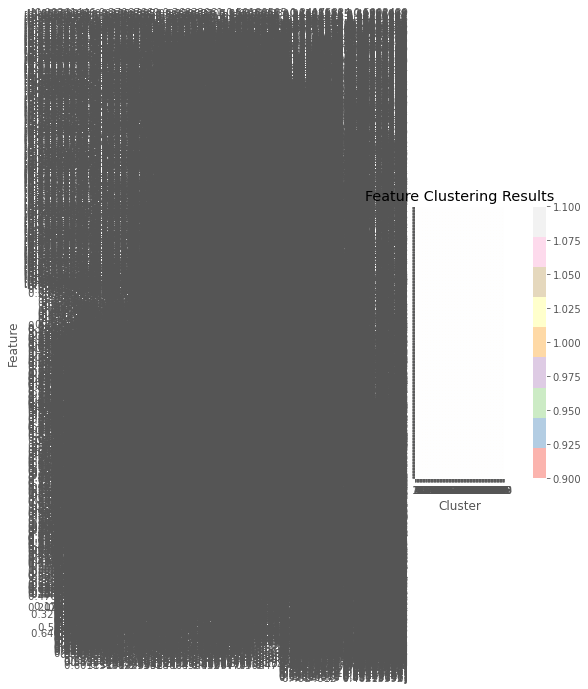

In [236]:
import numpy as np
import matplotlib.pyplot as plt

# Create binary matrix of feature clusters
n_features = len(F_strong)
n_clusters = len(c)
cluster_matrix = np.zeros((n_features, n_clusters))
for i, f in enumerate(F_strong):
    for j, cluster in enumerate(c):
        if f in cluster:
            cluster_matrix[i, j] = 1

# Plot heatmap of cluster matrix
plt.figure(figsize=(10, 5))
plt.imshow(cluster_matrix, cmap='Pastel1')
plt.yticks(np.arange(n_features), F_strong)
plt.xticks(np.arange(n_clusters), np.arange(1, n_clusters+1))
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.title('Feature Clustering Results')
plt.colorbar()
plt.show()


In [237]:
import numpy as np

def initialization_operator(feature_clusters, num_particles):
    # Calculate the selected probability for each cluster
    p_c = np.array([len(cluster)/num_particles for cluster in feature_clusters])

    # Initialize particles
    particles = np.zeros((num_particles, len(feature_clusters)), dtype=int)

    # Randomly select features from the clusters to create particles
    for i in range(num_particles):
        for j in range(len(feature_clusters)):
            if np.random.rand() < p_c[j]:
                # Randomly select a feature from the cluster
                a = np.random.choice(feature_clusters[j])
                particles[i, j] = a

    return particles



In [238]:
# F_strong, SU_strong, _ = find_strong_relevance_features(X_norm_df.values, y.values, None)
# feature_clusters, _ = feature_clustering(F_strong, SU_strong, 0.1)
num_particles = 100
particles = initialization_operator(c, num_particles)
print(particles)


[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


ValueError: too many values to unpack (expected 2)

In [38]:
# def feature_clustering(F_strong, C, rho1=None):
#     """
#     This function performs feature clustering on the set of strong relevance features obtained by the first phase
#     :param F_strong: The set of strong relevance features obtained by the first phase
#     :param C: The set of class labels
#     :param rho1: The threshold value for feature correlation degree
#     :return: The M feature clusters
#     """

#     # Step 1: Sort all the features by their C-relevance values
#     U0 = np.argsort(-SU)

#     # Step 2: Initialize parameters
#     M = 0
#     U = U0.copy()
#     cluster_indices = []
#     feature_clusters = []

#     while len(U) > 0:
#         # Step 3: Select the first feature in U
#         f_1th = U[0]
#         cluster_indices.append([f_1th])
#         U = np.delete(U, 0)

#         # Step 4: Calculate the C-relevance value of f_1th
#         SU_f_1th = SU[f_1th]

#         # Step 5: Remove features which have weak correlation with f_1th
#         U1 = U.copy()
#         for i in U1:
#             # Step 9: Calculate the C-relevance value of f_i
#             SU_f_i = SU[i]

#             # Step 10: Calculate the difference value
#             dt = SU_f_1th - SU_f_i

#             # Step 11: Remove f_i from U1 if dt > rho1
#             if rho1 is None or dt > rho1:
#                 U = np.delete(U, np.where(U == i))

#         # Step 15: Find all features similar to f_1th and save them into the cluster Clusterk
#         cluster_indices[-1].extend([i for i in U1 if i not in U])
#         feature_clusters.append(F[:, cluster_indices[-1]])
#         M += 1

#     return feature_clusters
def step2(F_strong, C, th, SU):
    U0 = list(F_strong)
    M = len(F_strong)
    k = 0
    Clusters = []
    while len(U0) > 0:
        k += 1
        U1 = list(U0)
        Clusterk = []
        U1.sort(key=lambda x: SU[x])
        f1 = U1[0]
        SUf1 = SU[f1]
        Clusterk.append(f1)
        U1.remove(f1)
        i = 0
        while i < len(U1):
            fi = U1[i]
            if SUf1 - SU[fi] <= th:
                Clusterk.append(fi)
                U1.remove(fi)
            else:
                i += 1
        Clusters.append(Clusterk)
        U0 = list(set(U0) - set(Clusterk))
    return Clusters

# def feature_clustering(F_strong, C, rho1=None):
#     U0 = sorted(range(len(F_strong)), key=lambda k: -SU[k])
#     clusters = []
#     k = 0
#     while len(U0) > 0:
#         U1 = U0.copy()
#         cluster = [U1.pop(0)]
#         print(cluster)
#         while len(U1) > 0:
#             dt = [SU[cluster[0]] - SU[i] for i in U1]
#             dt_max = max(dt)
#             if dt_max > rho1:
#                 U1.pop(dt.index(dt_max))
#             else:
#                 break
#         for i in U1:
#             su_f1_i = np.corrcoef(F_strong[:, cluster[0]], F_strong[:, i])[0, 1]
#             su_f1_C = np.corrcoef(F_strong[:, cluster[0]], C)[0, 1]
#             su_i_C = np.corrcoef(F_strong[:, i], C)[0, 1]
#             if su_f1_i >= min(su_f1_C, su_i_C):
#                 cluster.append(i)
#         clusters.append(cluster)
#         U0 = [i for i in U0 if i not in cluster]
#         k += 1
#     return clusters


In [39]:
step2(selected_indices,y.values,None,SU)

TypeError: '<=' not supported between instances of 'float' and 'NoneType'

261


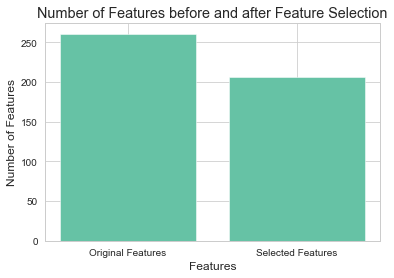